## Insight project: part 3.1
### Random Forest

In [1]:
#apply logistic regression on training data
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [2]:
#read data, apply 80:20 split for train vs validation
data = pd.read_csv('data/train.csv', index_col=False)
data = data.sample(frac=1, random_state=1)
train = data[:int(len(data) * 0.8)]
val = data[int(len(data) * 0.8):]
print(train.shape)
print(val.shape)
#print(train.head())
print(val.head())

(566, 4098)
(142, 4098)
                    Unnamed: 0  hits    0    1    2    3    4    5    6    7  \
660               Azaguanine-8     1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
649  Ondansetron Hydrochloride     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
505             Chlorothiazide     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
575                Bromperidol     1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
231               Quinethazone     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     ...   4086  4087  4088  4089  4090  4091  4092  4093  4094  4095  
660  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
649  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
505  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
575  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
231  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 4098 columns]


In [3]:
# #test logistic regression model by accuracy
# ne = np.arange(10, 500, 50)
# val_accuracy = []
# val_precision = []
# val_recall = []
# val_f1 = []
# auc_scores = []
# for i in ne:  
#     rf = RandomForestClassifier(n_estimators=i, criterion='gini', max_features='sqrt', max_depth=None, 
#                                 min_samples_split=2, min_samples_leaf=1, 
#                                 min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
#                                 min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
#                                 oob_score=False, n_jobs=-1, random_state=6, verbose=0, warm_start=False,
#                                 class_weight={1:3, 0:1})
#     rf.fit(train.iloc[:, 2:].values, train.iloc[:, 1].values)    
#     val_accuracy.append(rf.score(val.iloc[:, 2:].values, val.iloc[:, 1].values))
#     val_pred = rf.predict(val.iloc[:, 2:].values)    
#     val_precision.append(precision_score(val.iloc[:, 1].values, val_pred))
#     val_recall.append(recall_score(val.iloc[:, 1].values, val_pred))
#     val_f1.append(f1_score(val.iloc[:, 1].values, val_pred))
#     val_pred_proba = rf.predict_proba(val.iloc[:, 2:].values)
#     auc_scores.append(roc_auc_score(val.iloc[:, 1].values, val_pred_proba[:, 1]))

# plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=2, wspace=0.3, hspace=0.3)
# plt.subplot(231)
# plt.title('accuracy')
# plt.ylabel('score')
# plt.xlabel('n_estimators')
# plt.ylim(0,1)
# plt.scatter(ne, val_accuracy)
# plt.subplot(232)
# plt.title('precision')
# plt.xlabel('n_estimators')
# plt.ylim(0,1)
# plt.scatter(ne, val_precision)
# plt.subplot(233)
# plt.title('recall')
# plt.ylabel('score')
# plt.xlabel('n_estimators')
# plt.ylim(0,1)
# plt.scatter(ne, val_recall)
# plt.subplot(234)
# plt.title('f1_score')
# plt.xlabel('n_estimators')
# plt.ylim(0,1)
# plt.scatter(ne, val_f1)
# plt.subplot(235)
# plt.title('auc_score')
# plt.xlabel('n_estimators')
# plt.ylim(0.5,1)
# plt.scatter(ne, auc_scores)

auc_score: 0.7468599033816425


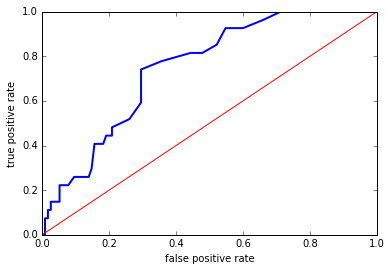

In [4]:
#roc curve
rf = RandomForestClassifier(n_estimators=60, criterion='gini', max_features='sqrt', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
                                min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                                oob_score=False, n_jobs=-1, random_state=6, verbose=0, warm_start=False,
                                class_weight={1:3, 0:1})
rf.fit(train.iloc[:, 2:].values, train.iloc[:, 1].values)
pred = rf.predict_proba(val.iloc[:, 2:].values)
auc_score = roc_auc_score(val.iloc[:, 1].values, pred[:, 1])
fpr, tpr, thresholds = roc_curve(val.iloc[:, 1].values, pred[:, 1])

print('auc_score: {}'.format(auc_score))

#plot auc curve
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot(fpr, tpr, c='b', linewidth=2)
plt.plot([0, 1], [0, 1], c='r', linewidth=1)

(array([  2.74900000e+03,   5.56000000e+02,   2.71000000e+02,
          1.63000000e+02,   1.03000000e+02,   6.30000000e+01,
          5.40000000e+01,   3.10000000e+01,   1.80000000e+01,
          1.80000000e+01,   1.40000000e+01,   1.50000000e+01,
          7.00000000e+00,   9.00000000e+00,   7.00000000e+00,
          3.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([ 0.        ,  0.00019123,  0.00038246,  0.00057369,  0.00076492,
         0.00095615,  0.00114738,  0.00133861,  0.00152984,  0.00172107,
         0.0019123 ,  0.00210353,  0.00229476,  0.00248599,  0.00267722,
         0.00286845,  0.00305968,  0.00325091,  0.00344214,  0.00363337,
         0.0038246 ,  0.00401582,  0.00420705,  0.00439828,  0.00458951,
         0.00

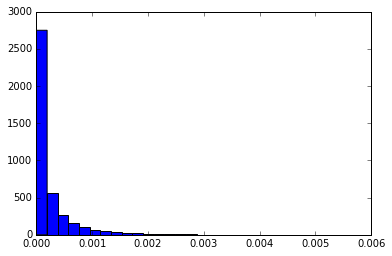

In [5]:
rf.feature_importances_
plt.hist(np.abs(rf.feature_importances_), bins=30)


In [6]:
index1 = np.where(np.abs(rf.feature_importances_) > 0.001)
index1 = index1[0]
index1.shape

(239,)

In [7]:
index1

array([  21,   32,   33,   41,   45,   69,   75,   90,   97,  116,  158,
        159,  197,  202,  209,  216,  236,  287,  301,  309,  322,  335,
        343,  350,  378,  389,  390,  397,  433,  496,  522,  561,  582,
        610,  641,  656,  658,  673,  675,  695,  699,  703,  724,  745,
        747,  807,  857,  868,  875,  885,  890,  917, 1028, 1030, 1042,
       1088, 1101, 1128, 1132, 1160, 1167, 1184, 1189, 1236, 1256, 1297,
       1310, 1313, 1321, 1325, 1359, 1361, 1365, 1380, 1409, 1430, 1448,
       1453, 1458, 1471, 1480, 1485, 1508, 1550, 1572, 1581, 1618, 1627,
       1630, 1652, 1662, 1683, 1746, 1855, 1877, 1917, 1921, 1928, 1947,
       1950, 1951, 1956, 1963, 1969, 1970, 2004, 2005, 2032, 2049, 2059,
       2106, 2128, 2162, 2213, 2242, 2255, 2270, 2279, 2300, 2301, 2331,
       2334, 2340, 2342, 2349, 2362, 2367, 2381, 2383, 2388, 2391, 2400,
       2414, 2416, 2419, 2435, 2437, 2439, 2440, 2509, 2532, 2534, 2551,
       2599, 2611, 2625, 2635, 2640, 2698, 2709, 27

In [8]:
lr = LogisticRegression(penalty='l1', C=10, tol=0.01, class_weight={1:3, 0:1})
lr.fit(train.iloc[:, 2:].values, train.iloc[:, 1].values)
index2 = np.where(lr.coef_ != 0)[1]
#index2 = index2.reshape(1, -1)
np.shape(index2)

(602,)

In [9]:
index1

array([  21,   32,   33,   41,   45,   69,   75,   90,   97,  116,  158,
        159,  197,  202,  209,  216,  236,  287,  301,  309,  322,  335,
        343,  350,  378,  389,  390,  397,  433,  496,  522,  561,  582,
        610,  641,  656,  658,  673,  675,  695,  699,  703,  724,  745,
        747,  807,  857,  868,  875,  885,  890,  917, 1028, 1030, 1042,
       1088, 1101, 1128, 1132, 1160, 1167, 1184, 1189, 1236, 1256, 1297,
       1310, 1313, 1321, 1325, 1359, 1361, 1365, 1380, 1409, 1430, 1448,
       1453, 1458, 1471, 1480, 1485, 1508, 1550, 1572, 1581, 1618, 1627,
       1630, 1652, 1662, 1683, 1746, 1855, 1877, 1917, 1921, 1928, 1947,
       1950, 1951, 1956, 1963, 1969, 1970, 2004, 2005, 2032, 2049, 2059,
       2106, 2128, 2162, 2213, 2242, 2255, 2270, 2279, 2300, 2301, 2331,
       2334, 2340, 2342, 2349, 2362, 2367, 2381, 2383, 2388, 2391, 2400,
       2414, 2416, 2419, 2435, 2437, 2439, 2440, 2509, 2532, 2534, 2551,
       2599, 2611, 2625, 2635, 2640, 2698, 2709, 27

In [10]:
intersect = np.intersect1d(index1, index2, True)
intersect.shape

(170,)

In [11]:
new_features = rf.feature_importances_[np.abs(rf.feature_importances_) > 0.0035]
new_features.size

10

(array([ 5.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 0.00351142,  0.00373396,  0.00395651,  0.00417906,  0.00440161,
         0.00462415,  0.0048467 ,  0.00506925,  0.0052918 ,  0.00551435,
         0.00573689]),
 <a list of 10 Patch objects>)

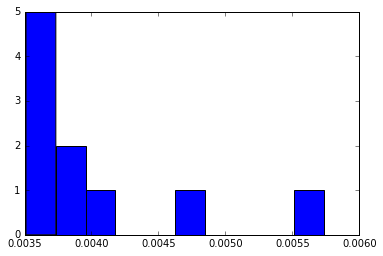

In [12]:
plt.hist(new_features)

In [19]:
index3 = np.where(rf.feature_importances_ > 0.0035)
index3

(array([ 343,  397,  561,  917, 2419, 2698, 2828, 3243, 3914, 3921]),)

In [20]:
rf.feature_importances_[index3]

array([ 0.00410343,  0.00573689,  0.00370932,  0.00365734,  0.00358784,
        0.00387242,  0.00483697,  0.00380585,  0.0036845 ,  0.00351142])

In [21]:
df = pd.DataFrame()
df['id'] = index3[0]
df['importance'] = rf.feature_importances_[index3]
df = df.sort_values(by=['importance'], ascending=False)
df

,id,importance
1,397,0.005737
6,2828,0.004837
0,343,0.004103
5,2698,0.003872
7,3243,0.003806
2,561,0.003709
8,3914,0.003685
3,917,0.003657
4,2419,0.003588
9,3921,0.003511


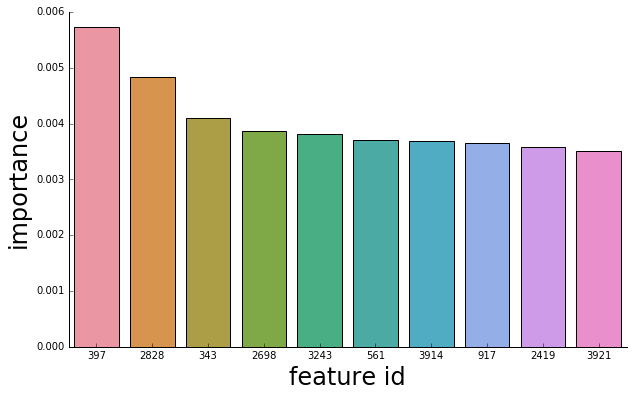

In [23]:
import seaborn as sns
plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='id', y='importance', data=df, order=df['id'])
ax.set_xlabel("feature id", size=24)
ax.set_ylabel("importance", size=24)
sns.despine()

In [17]:
df2 = train[train["343"] == 1]
df2

,Unnamed: 0,hits,0,1,2,3,4,5,6,7,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
631,Acemetacin,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628,Carbenoxolone disodium salt,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,"Amethopterin (R,S)",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406,Spaglumic acid,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,Lansoprazole,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Leflunomide,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
679,Norgestimate,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
464,Mebeverine hydrochloride,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
617,Folic acid,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,Omeprazole,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
